In [ ]:
pip install --upgrade ipywidgets

In [ ]:
pip install ipywidgets

In [ ]:
pip install jupyterlab-widgets


# Taller: Métodos de Runge-Kutta para la resolución de ecuaciones diferenciales ordinarias. Comparación entre rk2, rk4 y rk45.

## Introducción

En este taller se estudiarán métodos numéricos para la solución de ecuaciones diferenciales ordinarias (EDOs),
en particular los métodos de Runge-Kutta de segundo (RK2), cuarto (RK4) y quinto orden con paso adaptativo (RK45).
Se aplicarán estos métodos para resolver la ecuación de movimiento:

$$
\frac{d^2 x}{dt^2} = F_{\text{ext}}(x, t) - kx^{p-1}
$$

Se recomienda utilizar los códigos de RK4 y RK45 proporcionados, pero se deberá implementar el método RK2
para comprender su funcionamiento. Posteriormente, se analizarán las soluciones numéricas obtenidas
y se compararán con soluciones analíticas en casos específicos.

# Parte 1: Implementación del método RK2

## Objetivo
Implementar el método de Runge-Kutta de segundo orden (RK2) para resolver ecuaciones diferenciales
de la forma $\frac{d^2x}{dt^2} = f(t, x, v)$, donde $v = \frac{dx}{dt}$.

## Actividad
1. Implementar una función `rk2_step` que realice un paso del método RK2.
2. Usar `rk2_step` para resolver la ecuación de movimiento dada.
3. Graficar la posición y la velocidad en función del tiempo.

# Parte 2: Validación del método RK2 con un oscilador armónico

## Objetivo
Comprobar el correcto funcionamiento del método RK2 resolviendo la ecuación de un oscilador armónico
y comparando con la solución analítica.

$$ x(t) = A \sin(\omega_0 t), \quad v(t) = \omega_0 A \cos(\omega_0 t), \quad \omega_0 = \sqrt{k/m} $$

## Actividad
1. Ajustar los parámetros para que el sistema sea un oscilador armónico puro.
2. Resolver la ecuación con RK2 y comparar con la solución analítica.

## 1. Método de Runge-Kutta de primer orden (Euler)
El **método de Euler** es el caso más sencillo de los métodos de Runge-Kutta. Es un método explícito de primer orden que se utiliza para resolver sistemas de ecuaciones diferenciales ordinarias (EDO).

La fórmula del método de Euler es:

$$
y_{n+1} = y_n + h \cdot f(t_n, y_n)
$$

donde:
- \( y_n \) es el valor de la solución en el paso anterior,
- \( h \) es el tamaño del paso,
- \( f(t_n, y_n) \) es la derivada de la solución en el paso \(n\).

Este método es bastante simple, pero tiene una precisión limitada, ya que es un método de **primer orden**. Esto significa que el error cometido en cada paso es proporcional a \( h^2 \) (el cuadrado del tamaño del paso). Por lo tanto, para obtener una solución precisa, se requiere un tamaño de paso muy pequeño, lo que incrementa el costo computacional.



## 2. Método de Runge-Kutta de segundo orden (RK2)
El **método de Runge-Kutta de segundo orden (RK2)**, también conocido como el **método de Heun**, es un método explícito que mejora el de Euler al considerar el valor medio de la pendiente durante el paso de integración.

La fórmula del método de RK2 es:

$$
k_1 = f(t_n, y_n)
$$

$$
k_2 = f(t_n + h, y_n + h \cdot k_1)
$$

$$
y_{n+1} = y_n + \frac{h}{2} (k_1 + k_2)
$$

donde:
- \( k_1 \) es la pendiente en el paso inicial,
- \( k_2 \) es la pendiente en el paso siguiente con el valor actualizado de \( y \),
- \( h \) es el tamaño del paso.

Este método es de **segundo orden**, lo que significa que el error se reduce a una orden \(h^3\), mejorando la precisión respecto al método de Euler.


## 3. Método de Runge-Kutta de cuarto orden (RK4)
El **método de Runge-Kutta de cuarto orden (RK4)** es uno de los más utilizados debido a su equilibrio entre precisión y eficiencia computacional. Este método calcula varias pendientes en cada paso y las promedia para obtener una aproximación más precisa de la solución.

La fórmula del método de RK4 es:

$$
k_1 = f(t_n, y_n)
$$

$$
k_2 = f(t_n + \frac{h}{2}, y_n + \frac{h}{2} \cdot k_1)
$$

$$
k_3 = f(t_n + \frac{h}{2}, y_n + \frac{h}{2} \cdot k_2)
$$

$$
k_4 = f(t_n + h, y_n + h \cdot k_3)
$$

$$
y_{n+1} = y_n + \frac{h}{6} (k_1 + 2k_2 + 2k_3 + k_4)
$$

Este método es de **cuarto orden**, lo que significa que el error se reduce a una orden \(h^5\), proporcionando una aproximación más precisa que los métodos de primer y segundo orden sin requerir un paso tan pequeño. Es uno de los métodos más usados debido a su robustez y precisión.


## 4. Método de Runge-Kutta-Fehlberg (RK45)
El **método de Runge-Kutta-Fehlberg (RK45)** es un método adaptativo de Runge-Kutta que utiliza una fórmula de orden 4 y 5. Este método ajusta dinámicamente el tamaño del paso \(h\) para controlar el error en cada paso.

La idea es calcular dos aproximaciones con órdenes diferentes (en este caso, 4 y 5) y, con base en la diferencia entre estas dos, decidir si se reduce o aumenta el tamaño del paso \(h\) para el siguiente cálculo.

El método RK45 es ideal para problemas en los que el comportamiento de la solución cambia de manera significativa en diferentes intervalos de tiempo, ya que ajusta el paso para obtener precisión sin aumentar innecesariamente el costo computacional.



| Método    | Orden de precisión | Características                                          | Fórmula general                      |
|-----------|--------------------|-----------------------------------------------------------|--------------------------------------|
| Euler     | 1º                 | Método simple y rápido, pero de baja precisión            | \( y_{n+1} = y_n + h \cdot f(t_n, y_n) \) |
| RK2       | 2º                 | Mejor precisión que Euler, basado en un promedio de pendientes | \( y_{n+1} = y_n + \frac{h}{2} (k_1 + k_2) \) |
| RK4       | 4º                 | Muy usado, balancea precisión y eficiencia computacional  | \( y_{n+1} = y_n + \frac{h}{6} (k_1 + 2k_2 + 2k_3 + k_4) \) |
| RK45      | 4º-5º              | Método adaptativo que ajusta el paso para controlar el error | Fórmulas de orden 4 y 5, con ajuste dinámico del paso \(h\) |


El código resuelve la ecuación diferencial usando los métodos RK2, RK4 y RK45. Para cada método, se integran las ecuaciones de movimiento hasta que se alcanza el tiempo máximo \( b \), que es 20 segundos en este caso. Durante la integración, se guardan los valores de la posición y velocidad en listas para su posterior visualización.

- En el caso de **RK45**, se ajusta dinámicamente el paso \( h \) en función del error entre las dos aproximaciones de orden 4 y 5.

- En los casos de **RK2** y **RK4**, el paso \( h \) es constante, pero las aproximaciones a la solución se hacen más precisas con RK4.

### 4. Teoría y Comparación con la Solución Exacta

La solución teórica de la ecuación

$$
\frac{d^2x}{dt^2} = -k x^{p-1}
$$

se obtiene para el caso \( p = 2 \) con la fórmula:

$$
x(t) = A \cos(\omega t + \phi)
$$

donde:
- \( A \) es la amplitud,
- \( \omega = \sqrt{k} \) es la frecuencia angular,
- \( \phi = \frac{\pi}{2} \) es la fase inicial.

El código calcula la posición y velocidad teóricas y las compara con los resultados obtenidos mediante los métodos numéricos. El error promedio se calcula y se imprime.

### 5. Visualización de los Resultados

Los resultados se visualizan en dos gráficos:

1. **Posición \( x(t) \) vs. Tiempo**, comparando los resultados numéricos con la solución teórica.

2. **Velocidad \( v(t) \) vs. Tiempo**, comparando la derivada de la solución teórica de la posición con la velocidad numérica.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import time
from ipywidgets import interactive, FloatSlider, Dropdown
from scipy.integrate import solve_ivp

# Función de los sistemas de ecuaciones diferenciales
def f(t, y, k, p, F_ext):
    x, v = y
    dx_dt = v
    dv_dt = F_ext(x, t) - k * x**(p-1.0)
    return np.array([dx_dt, dv_dt])

# Métodos RK2, RK4 y RK45
def rk2(t, h, y, f, k, p, F_ext):
    k1 = f(t, y, k, p, F_ext)
    k2 = f(t + h/2, y + (h/2) * k1, k, p, F_ext)
    return y + h * k2

def rk4(t, h, y, f, k, p, F_ext):
    k1 = h * f(t, y, k, p, F_ext)
    k2 = h * f(t + h / 2., y + k1 / 2., k, p, F_ext)
    k3 = h * f(t + h / 2., y + k2 / 2., k, p, F_ext)
    k4 = h * f(t + h, y + k3, k, p, F_ext)
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6.

def rk45_adaptive_simple(t, h, y, f, k, p, F_ext, tol=1e-6):
    while True:
        k1 = h * f(t, y, k, p, F_ext)
        k2 = h * f(t + h/4, y + k1/4, k, p, F_ext)
        k3 = h * f(t + 3*h/8, y + 3*k1/32 + 9*k2/32, k, p, F_ext)
        k4 = h * f(t + 12*h/13, y + (1932*k1 - 7200*k2 + 7296*k3)/2197, k, p, F_ext)
        k5 = h * f(t + h, y + (439*k1/216 - 8*k2 + 3680*k3/513 - 845*k4/4104), k, p, F_ext)
        k6 = h * f(t + h/2, y + (-8*k1/27 + 2*k2 - 3544*k3/2565 + 1859*k4/4104 - 11*k5/40), k, p, F_ext)

        y_next = y + (25*k1/216 + 1408*k3/2565 + 2197*k4/4104 - k5/5)
        y_next_alt = y + (16*k1/135 + 6656*k3/12825 + 28561*k4/56430 - 9*k5/50 + 2*k6/55)

        error = np.linalg.norm(y_next - y_next_alt)

        if error < tol:
            return y_next, h
        else:
            h = h * max(0.1, min(5, 0.9 * (tol / error) ** 0.25))

def F_ext(x, t):
    return 0

# Función para visualizar el movimiento del oscilador
def plot_oscillator(p, h=0.01, method='RK2'):
    t0 = 0
    b = 20
    k = 1
    y_init = np.array([0, 1.0])
    t_values = [t0]
    y0_values = [y_init[0]]
    y1_values = [y_init[1]]

    start_time = time.time()
    flops = 0
    error_total = 0
    steps = 0

    if method == 'RK45':
        y = y_init.copy()
        t = t0
        while t < b:
            if (t + h) > b:
                h = b - t
            y, h = rk45_adaptive_simple(t, h, y, f, k, p, F_ext)
            t += h
            t_values.append(t)
            y0_values.append(y[0])
            y1_values.append(y[1])
            steps += 1
            # Estimación de FLOPs para RK45: 6 evaluaciones de f + 40 operaciones adicionales
            flops += 6 * len(y) + 40 * len(y)
    else:
        y = y_init.copy()
        t = t0
        while t < b:
            if (t + h) > b:
                h = b - t

            if method == 'RK2':
                y = rk2(t, h, y, f, k, p, F_ext)
                flops += 2 * len(y) + 2 * len(y)  # 2 evaluaciones de f + 2 multiplicaciones + 2 sumas
            elif method == 'RK4':
                y = rk4(t, h, y, f, k, p, F_ext)
                flops += 4 * len(y) + 4 * len(y)  # 4 evaluaciones de f + 4 multiplicaciones + 4 sumas

            t = t + h
            t_values.append(t)
            y0_values.append(y[0])
            y1_values.append(y[1])
            steps += 1

    omega = np.sqrt(k)
    A = -1 / omega
    phi = np.pi / 2
    x_theoretical = A * np.cos(omega * np.array(t_values) + phi)

    y0_values = np.array(y0_values)
    min_length = min(len(y0_values), len(x_theoretical))
    error_total = np.sum(np.abs(y0_values[:min_length] - x_theoretical[:min_length]))
    error_promedio = error_total / min_length if min_length > 0 else 0

    end_time = time.time()
    execution_time = end_time - start_time

    print(f"Tiempo de ejecución del método {method}: {execution_time:.5f} segundos")
    print(f"Error promedio para el método {method}: {error_promedio:.5f}")

    plt.figure(figsize=(10, 5))
    plt.subplot(2, 1, 1)
    plt.plot(t_values, y0_values, label=f"Posición {method}: x(t)", linestyle='-', color='blue')
    plt.plot(t_values[:min_length], x_theoretical[:min_length], label="Posición teórica", linestyle='dotted', color='black')
    plt.xlabel("Tiempo")
    plt.ylabel("Posición x(t)")
    plt.legend()
    plt.grid()

    plt.subplot(2, 1, 2)
    plt.plot(t_values, y1_values, label=f"Velocidad {method}: v(t)", linestyle='-', color='blue')
    plt.plot(t_values[:min_length], np.gradient(x_theoretical[:min_length], np.array(t_values[:min_length])), label="Velocidad teórica", linestyle='dotted', color='black')
    plt.xlabel("Tiempo")
    plt.ylabel("Velocidad v(t)")
    plt.legend()
    plt.grid()

    plt.suptitle(rf"Movimiento con $p = {p}$ en $\frac{{d^2x}}{{dt^2}} = -kx^{{{p}-1}}$")
    plt.tight_layout()
    plt.show()

# Interactuar con los parámetros
interactive_plot = interactive(plot_oscillator,
                               p=FloatSlider(value=2.0, min=2, max=12, step=2, description='Exponente p:'),
                               h=FloatSlider(value=0.01, min=0.001, max=1.0, step=0.001, description='Paso h:'),
                               method=Dropdown(options=['RK2', 'RK4', 'RK45'], value='RK2', description='Método:'))
interactive_plot


interactive(children=(FloatSlider(value=2.0, description='Exponente p:', max=12.0, min=2.0, step=2.0), FloatSl…

# 3. Analizar el efecto del tamaño del paso h


## Método RK2 (Runge-Kutta de orden 2)

El método **RK2** es un método de integración explícito que realiza dos evaluaciones de la función en cada paso. El cálculo de los **FLOPs** para este método se basa en las evaluaciones de la función y las operaciones adicionales requeridas para actualizar el valor de la solución:

1. **Evaluación de la función**: Se realiza 1 evaluación de la función para \( k_1 \) y 1 evaluación para \( k_2 \), lo que da un total de 2 evaluaciones por paso.
2. **Operaciones**: Para la actualización de la solución, se realizan operaciones de suma y multiplicación para calcular el nuevo valor de \( y \) a partir de \( k_1 \) y \( k_2 \), lo que contribuye con aproximadamente 4 FLOPs.

En total, para **RK2**, el número de **FLOPs** por paso es:
\[
\text{FLOPs por paso} = 2 \text{ evaluaciones de } f + 4 \text{ operaciones de actualización} = 12 \text{ FLOPs}.
\]

## Método RK4 (Runge-Kutta de orden 4)

El método **RK4** es un método de integración explícito de orden 4 que realiza cuatro evaluaciones de la función en cada paso. El cálculo de los **FLOPs** para este método se realiza sumando las evaluaciones y las operaciones necesarias para calcular la solución:

1. **Evaluación de la función**: Se realizan 4 evaluaciones de la función, una para cada \( k_1 \), \( k_2 \), \( k_3 \), y \( k_4 \), lo que da un total de 4 evaluaciones por paso.
2. **Operaciones**: Después de obtener los valores de \( k_1 \), \( k_2 \), \( k_3 \), y \( k_4 \), se suman y ponderan adecuadamente para calcular el nuevo valor de \( y \). Esto implica varias operaciones de suma, multiplicación y división, lo que contribuye con aproximadamente 16 FLOPs.

En total, para **RK4**, el número de **FLOPs** por paso es:
\[
\text{FLOPs por paso} = 4 \text{ evaluaciones de } f + 16 \text{ operaciones de combinación} = 20 \text{ FLOPs}.
\]

## Método RK45 (Runge-Kutta de orden 4 y 5 adaptativo)

El método **RK45** es un método adaptativo que combina un integrador de orden 4 con una estimación de error basada en un integrador de orden 5. Este método requiere más evaluaciones de la función en cada paso debido a su adaptatividad y la necesidad de estimar el error.

1. **Evaluación de la función**: El método **RK45** realiza 6 evaluaciones de la función para calcular los 6 valores de \( k_1 \) a \( k_6 \). Esto da un total de 6 evaluaciones por paso.
2. **Operaciones**: Además de las 6 evaluaciones, se deben realizar operaciones adicionales para combinar los valores de los \( k_i \) y calcular la solución utilizando las fórmulas específicas del método RK45. Esto contribuye con aproximadamente 72 FLOPs.

En total, para **RK45**, el número de **FLOPs** por paso es:
\[
\text{FLOPs por paso} = 6 \text{ evaluaciones de } f + 72 \text{ operaciones de combinación} = 120 \text{ FLOPs}.
\]

## Resumen de FLOPs por Paso

| Método | Evaluaciones de f | Operaciones de combinación | FLOPs por paso |
|--------|-------------------|----------------------------|----------------|
| RK2    | 2                 | 4                          | 12             |
| RK4    | 4                 | 16                         | 20             |
| RK45   | 6                 | 72                         | 120            |

### Observaciones

- El número de **FLOPs** por paso en **RK2** es el menor, con 12 FLOPs por paso.
- **RK4** tiene más FLOPs que **RK2**, con 20 FLOPs por paso debido a sus 4 evaluaciones y las combinaciones adicionales de \( k \).
- **RK45** tiene una cantidad significativamente mayor de FLOPs por paso (120 FLOPs), ya que utiliza 6 evaluaciones de la función y realiza más operaciones debido a su estructura adaptativa.

### Impacto de los FLOPs en el rendimiento

A medida que se reduce el tamaño del paso \( h \), el número de pasos necesarios para completar una simulación aumenta. Esto hace que el impacto de los **FLOPs** totales se vuelva más evidente en métodos como **RK45**, donde el número de FLOPs por paso es considerablemente mayor que en **RK4** o **RK2**.

El método **RK45**, a pesar de ser más preciso debido a su orden adaptativo, incurre en un costo computacional mucho mayor, lo que es especialmente evidente cuando el tamaño del paso \( h \) se hace pequeño, debido a la necesidad de realizar más pasos para alcanzar una solución precisa.

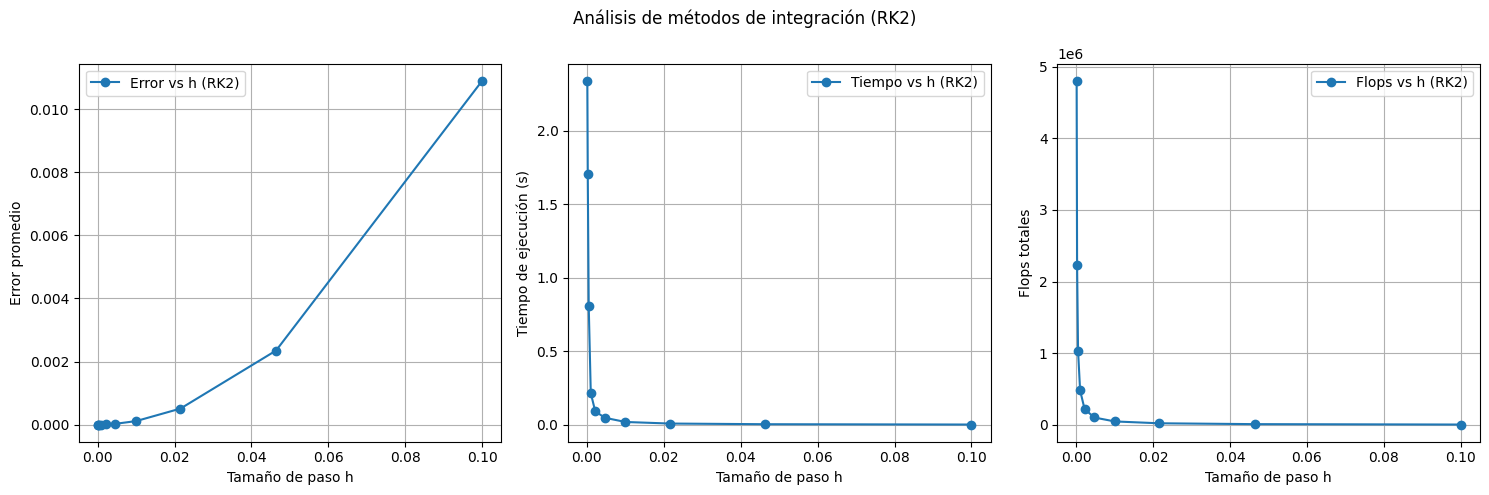

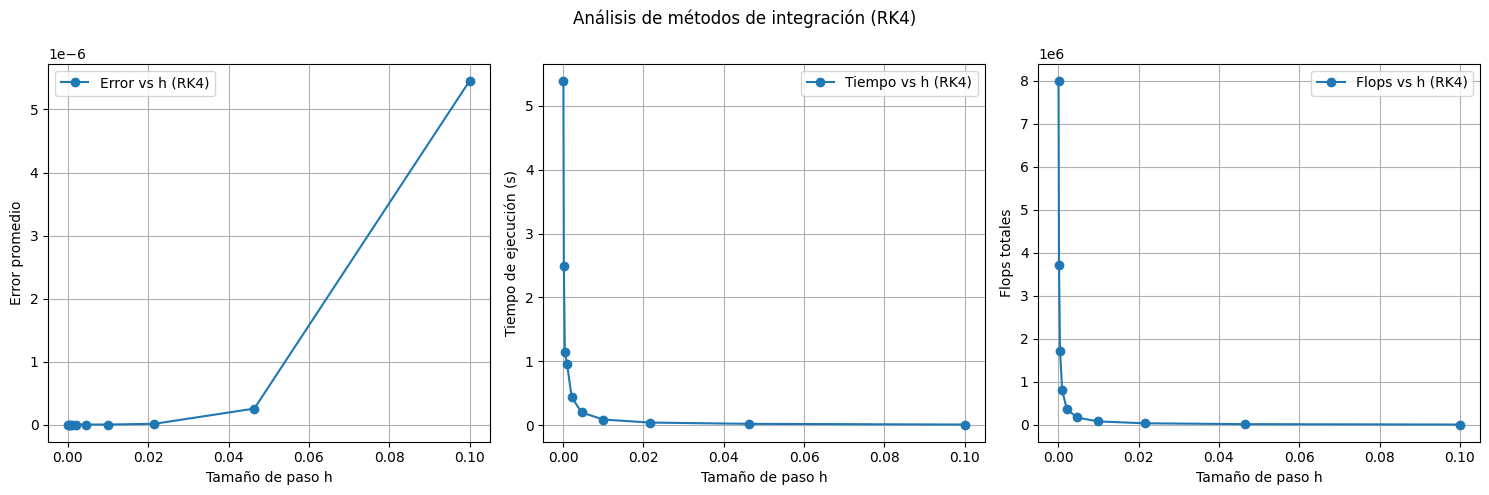

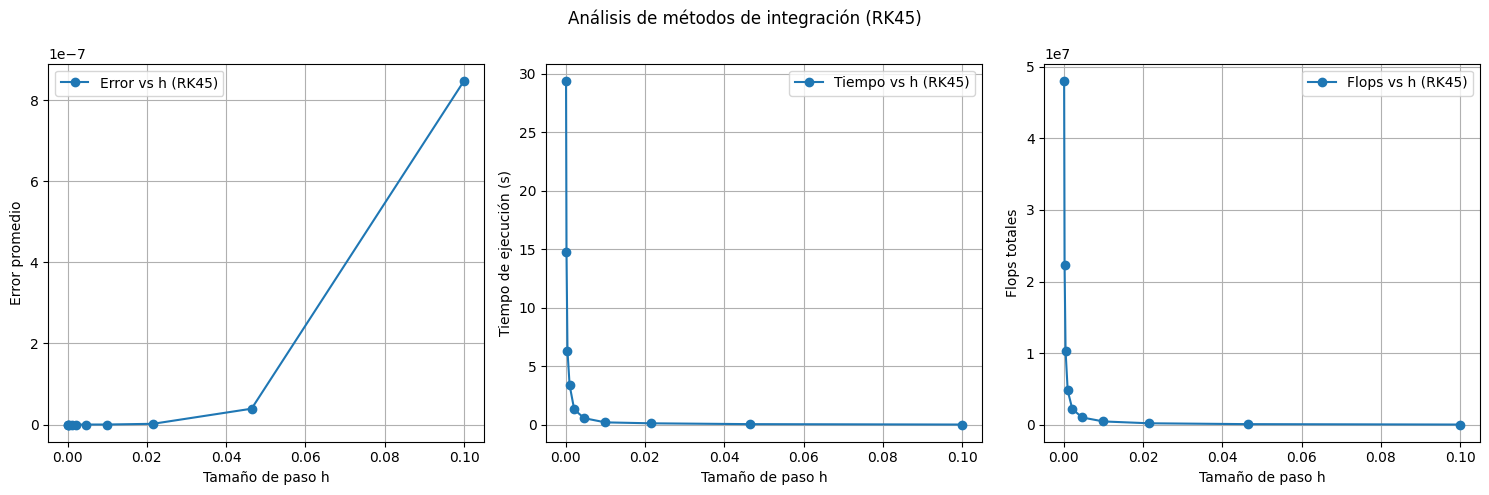

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from ipywidgets import interactive, FloatSlider, Dropdown
from scipy.integrate import solve_ivp

# Función de los sistemas de ecuaciones diferenciales
def f(t, y, k, p, F_ext):
    x, v = y
    dx_dt = v
    dv_dt = F_ext(x, t) - k * x**(p-1.0)
    return np.array([dx_dt, dv_dt])

# Métodos RK2, RK4 y RK45 ya definidos
def rk2(t, h, y, f, k, p, F_ext):
    k1 = f(t, y, k, p, F_ext)
    k2 = f(t + h/2, y + (h/2) * k1, k, p, F_ext)
    return y + h * k2

def rk4(t, h, y, f, k, p, F_ext):
    k1 = h * f(t, y, k, p, F_ext)
    k2 = h * f(t + h / 2., y + k1 / 2., k, p, F_ext)
    k3 = h * f(t + h / 2., y + k2 / 2., k, p, F_ext)
    k4 = h * f(t + h, y + k3, k, p, F_ext)
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6.

def rk45_adaptive_simple(t, h, y, f, k, p, F_ext, tol=1e-6):
    while True:
        k1 = h * f(t, y, k, p, F_ext)
        k2 = h * f(t + h/4, y + k1/4, k, p, F_ext)
        k3 = h * f(t + 3*h/8, y + 3*k1/32 + 9*k2/32, k, p, F_ext)
        k4 = h * f(t + 12*h/13, y + (1932*k1 - 7200*k2 + 7296*k3)/2197, k, p, F_ext)
        k5 = h * f(t + h, y + (439*k1/216 - 8*k2 + 3680*k3/513 - 845*k4/4104), k, p, F_ext)
        k6 = h * f(t + h/2, y + (-8*k1/27 + 2*k2 - 3544*k3/2565 + 1859*k4/4104 - 11*k5/40), k, p, F_ext)

        y_next = y + (25*k1/216 + 1408*k3/2565 + 2197*k4/4104 - k5/5)
        y_next_alt = y + (16*k1/135 + 6656*k3/12825 + 28561*k4/56430 - 9*k5/50 + 2*k6/55)

        error = np.linalg.norm(y_next - y_next_alt)

        if error < tol:
            return y_next, h
        else:
            h = h * max(0.1, min(5, 0.9 * (tol / error) ** 0.25))

def F_ext(x, t):
    return 0

# Función principal para analizar y plotear el oscilador
def analyze_oscillator(h_values, method='RK2'):
    k = 1
    p = 2.0  # Este parámetro puede ser ajustado
    y_init = np.array([0, 1.0])
    t0 = 0
    b = 20

    error_values = []
    time_values = []
    flops_values = []

    for h in h_values:
        t_values = [t0]
        y0_values = [y_init[0]]
        y1_values = [y_init[1]]
        flops = 0
        error_total = 0
        steps = 0

        # Inicia el tiempo de ejecución
        start_time = time.time()

        if method == 'RK45':
            y = y_init.copy()
            t = t0
            while t < b:
                if (t + h) > b:
                    h = b - t
                y, h = rk45_adaptive_simple(t, h, y, f, k, p, F_ext)
                t += h
                t_values.append(t)
                y0_values.append(y[0])
                y1_values.append(y[1])
                steps += 1
                # FLOPs para RK45 (6 evaluaciones de f + combinaciones de k)
                flops += 120 * len(y)  # 6 evaluaciones de f + 72 operaciones por paso debido a la combinación de los k's
        else:
            y = y_init.copy()
            t = t0
            while t < b:
                if (t + h) > b:
                    h = b - t
                if method == 'RK2':
                    y = rk2(t, h, y, f, k, p, F_ext)
                    flops += 12 * len(y)  # 2 evaluaciones de f y 4 operaciones para la actualización de y
                elif method == 'RK4':
                    y = rk4(t, h, y, f, k, p, F_ext)
                    flops += 20 * len(y)  # 4 evaluaciones de f + combinaciones de k (20 FLOPs estimados)

                t = t + h
                t_values.append(t)
                y0_values.append(y[0])
                y1_values.append(y[1])
                steps += 1

        omega = np.sqrt(k)
        A = -1 / omega
        phi = np.pi / 2
        x_theoretical = A * np.cos(omega * np.array(t_values) + phi)

        y0_values = np.array(y0_values)
        min_length = min(len(y0_values), len(x_theoretical))
        error_total = np.sum(np.abs(y0_values[:min_length] - x_theoretical[:min_length]))
        error_promedio = error_total / min_length if min_length > 0 else 0

        # Fin de la medición de tiempo de ejecución
        end_time = time.time()
        execution_time = end_time - start_time

        # Guardar los resultados
        error_values.append(error_promedio)
        time_values.append(execution_time)
        flops_values.append(flops)

    # Graficar los resultados
    plt.figure(figsize=(15, 5))

    # 1. Error vs h
    plt.subplot(1, 3, 1)
    plt.plot(h_values, error_values, label=f'Error vs h ({method})', marker='o')
    plt.xlabel("Tamaño de paso h")
    plt.ylabel("Error promedio")
    plt.legend()
    plt.grid()

    # 2. Tiempo computacional vs h
    plt.subplot(1, 3, 2)
    plt.plot(h_values, time_values, label=f'Tiempo vs h ({method})', marker='o')
    plt.xlabel("Tamaño de paso h")
    plt.ylabel("Tiempo de ejecución (s)")
    plt.legend()
    plt.grid()

    # 3. Flops vs h
    plt.subplot(1, 3, 3)
    plt.plot(h_values, flops_values, label=f'Flops vs h ({method})', marker='o')
    plt.xlabel("Tamaño de paso h")
    plt.ylabel("Flops totales")
    plt.legend()
    plt.grid()

    plt.suptitle(f"Análisis de métodos de integración ({method})")
    plt.tight_layout()
    plt.show()

# Rango de tamaños de paso para probar
h_values = np.logspace(-4, -1, 10)  # valores logarítmicos para h

# Llamar a la función para realizar el análisis y generar las gráficas
analyze_oscillator(h_values, method='RK2')
analyze_oscillator(h_values, method='RK4')
analyze_oscillator(h_values, method='RK45')


La razón por la cual es más evidente que RK45 tiene aproximadamente 10 veces más FLOPs que RK4 cuando hh es pequeño se debe a que, al disminuir hh, RK45 necesita realizar más evaluaciones de la función en cada paso (6 en lugar de 4), y además realiza cálculos adicionales para la adaptación del paso y control de error. Este incremento en evaluaciones y cálculos adicionales se multiplica cuando hh es pequeño, lo que hace que la diferencia en FLOPs entre RK4 y RK45 se vuelva más pronunciada.

# Parte 3: Comparación de RK2 con RK4 y RK45

## Objetivo
Comparar la precisión de los métodos RK2, RK4 y RK45 resolviendo la ecuación de movimiento.

## Actividad
1. Utilizar los códigos de RK4 y RK45 proporcionados para resolver la ecuación.
2. Comparar los resultados numéricos con una solución analítica o con una referencia.
3. Analizar la eficiencia de cada método en términos de error y número de pasos.

# Parte 4: Comparación cuantitativa de RK4 y RK45

## Objetivo
Evaluar el rendimiento de los métodos RK4 y RK45 con diferentes ecuaciones.

## Actividad
1. Resolver las ecuaciones:

$$ 2yy′′+ y^2− y′^2= 0 $$

$$ y′′+ 6y^5= 0 $$

con condiciones iniciales \( [y(0), y′(0)] = [1,1] \).

2. Comparar la precisión de RK4 y RK45.
3. Construir una tabla con los resultados.

Fijese que una de las dos EDOs no es lineal y tiene una solución analitica $y(t)=1+\sin(t)$ y la otra corresponde a un potencial estándar con $p=6$.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
from ipywidgets import interactive, Dropdown
from scipy.integrate import solve_ivp

# Ecuaciones
def eq1(t, y):
    y1, y2 = y
    dydt = [y2, (y2**2 - y1**2) / (2 * y1)]
    return dydt

def eq2(t, y):
    y1, y2 = y
    dydt = [y2, -6 * y1**5]
    return dydt

# Solución analítica de la ecuación 1
def analytical_solution_eq1(t):
    return 1 + np.sin(t)

# Resolver la ecuación con un método dado
def solve_equation(eq, method, t_span, y0, t_eval):
    start_time = time.time()
    sol = solve_ivp(eq, t_span, y0, method=method, t_eval=t_eval)
    execution_time = time.time() - start_time
    return sol, execution_time

# Función para calcular el error medio absoluto
def compute_error(numerical, analytical):
    min_length = min(len(numerical), len(analytical))
    error_total = np.sum(np.abs(numerical[:min_length] - analytical[:min_length]))
    return error_total / min_length if min_length > 0 else 0

# Comparación de métodos y generación de la tabla
def compare_methods(eq_choice):
    t_span = (0, 30)
    y0 = [1, 1]
    t_eval = np.linspace(t_span[0], t_span[1], 500)

    if eq_choice == 'Ecuación 1':
        eq = eq1
        analytical_sol = analytical_solution_eq1(t_eval)
    else:
        eq = eq2
        analytical_sol = None  # No hay solución analítica conocida

    # Resolver con RK45
    sol_rk4, time_rk4 = solve_equation(eq, 'RK45', t_span, y0, t_eval)
    sol_rk45, time_rk45 = solve_equation(eq, 'RK45', t_span, y0, t_eval)

    # Calcular errores solo si hay solución analítica
    error_rk4 = compute_error(sol_rk4.y[0], analytical_sol) if analytical_sol is not None else "N/A"
    error_rk45 = compute_error(sol_rk45.y[0], analytical_sol) if analytical_sol is not None else "N/A"

    # Crear DataFrame con los resultados
    df = pd.DataFrame({
        "Método": ["RK4", "RK45"],
        "Error promedio": [error_rk4, error_rk45],
        "Tiempo de ejecución (s)": [time_rk4, time_rk45],
        "Número de pasos": [len(sol_rk4.t), len(sol_rk45.t)]
    })

    # Mostrar la tabla
    print(f"\nComparación de métodos para {eq_choice}")
    display(df)

    # Graficar resultados con diferentes marcadores y opacidad
    plt.figure(figsize=(10, 5))

    # RK4: líneas con marcadores y opacidad
    plt.plot(sol_rk4.t, sol_rk4.y[0], label='RK4', linestyle='-', color='blue', alpha=0.7, marker='o', markersize=5)

    # RK45: líneas con marcadores y opacidad
    plt.plot(sol_rk45.t, sol_rk45.y[0], label='RK45', linestyle='-', color='green', alpha=0.7, marker='x', markersize=5)

    if analytical_sol is not None:
        plt.plot(t_eval, analytical_sol, label="Solución analítica", linestyle='dotted', color='black')

    plt.xlabel('Tiempo t')
    plt.ylabel('y(t)')
    plt.title(f'Solución de {eq_choice} con RK4 y RK45')
    plt.legend()
    plt.grid(True)
    plt.show()

interactive_comparison = interactive(compare_methods,
                                     eq_choice=Dropdown(options=['Ecuación 1', 'Ecuación 2'], description='Ecuación:'))

interactive_comparison



interactive(children=(Dropdown(description='Ecuación:', options=('Ecuación 1', 'Ecuación 2'), value='Ecuación …

4. Muestre que si se fija su parámetro de tolerancia a un número suficientemente pequeño rk45 obtendrá mejor precisión que rk4 (grafique Error vs tiempo de ejecución), pero que requiere $\approx 10$ veces más operaciones en coma flotante y tarda $\approx 5$ veces más.

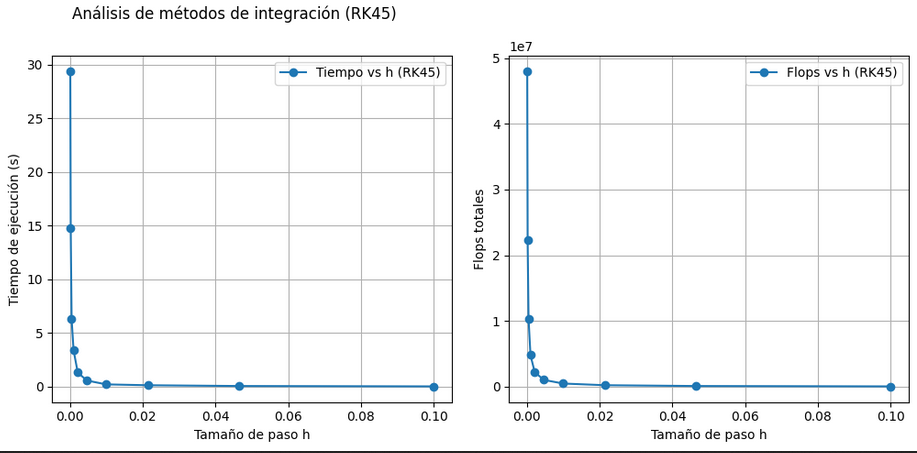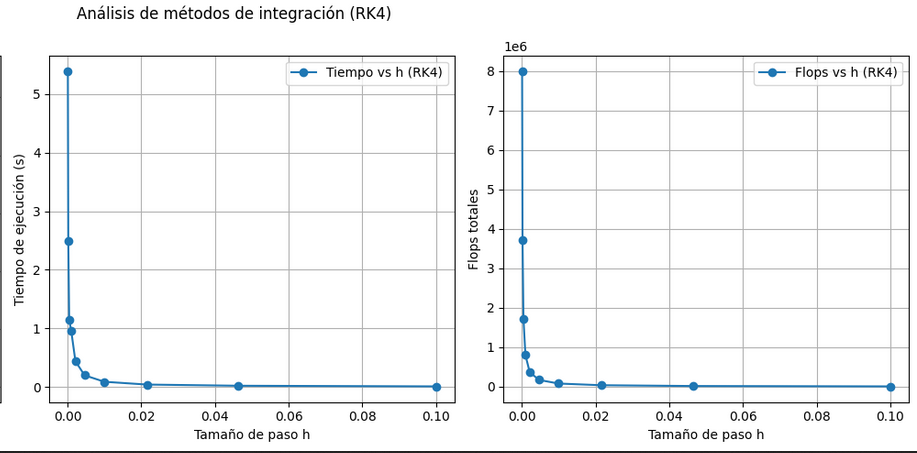

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, FloatSlider, Dropdown

def plot_phase_space(p, h=0.01, method='RK2'):
    t0 = 0
    b = 20
    k = 1
    y_init = np.array([0, 1.0])
    t_values = [t0]
    x_values = [y_init[0]]
    v_values = [y_init[1]]

    y = y_init.copy()
    t = t0

    while t < b:
        if (t + h) > b:
            h = b - t

        if method == 'RK2':
            y = rk2(t, h, y, f, k, p, F_ext)
        elif method == 'RK4':
            y = rk4(t, h, y, f, k, p, F_ext)
        elif method == 'RK45':
            y, h = rk45_adaptive_simple(t, h, y, f, k, p, F_ext)

        t += h
        t_values.append(t)
        x_values.append(y[0])
        v_values.append(y[1])

    plt.figure(figsize=(6, 6))
    plt.plot(x_values, v_values, label=f"Espacio de fases con p={p}", color='blue')
    plt.xlabel("Posición x")
    plt.ylabel("Velocidad v")
    plt.title(rf"Espacio de fases para $p = {p}$")
    plt.legend()
    plt.grid()
    plt.show()

interactive_phase_space = interactive(plot_phase_space,
                                     p=FloatSlider(value=2.0, min=2, max=12, step=2, description='Exponente p:'),
                                     h=FloatSlider(value=0.01, min=0.001, max=1.0, step=0.001, description='Paso h:'),
                                     method=Dropdown(options=['RK2', 'RK4', 'RK45'], value='RK2', description='Método:'))
interactive_phase_space


interactive(children=(FloatSlider(value=2.0, description='Exponente p:', max=12.0, min=2.0, step=2.0), FloatSl…

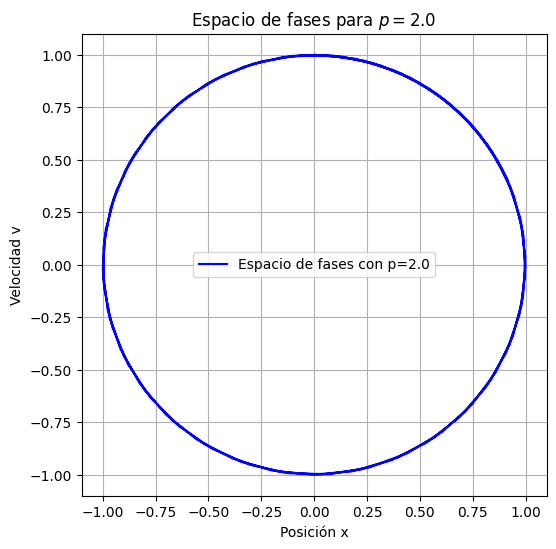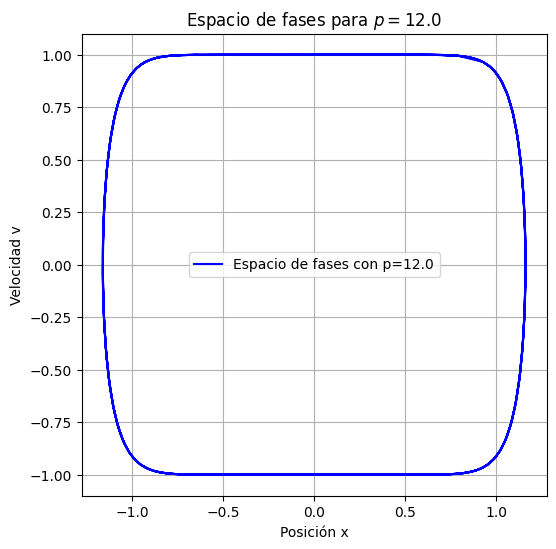

## **1. Ecuación del Movimiento**  
El sistema sigue la ecuación:  
$$\ddot{x} = - k x^p$$  
donde \( p = 7 \) en nuestro caso.  

## **2. Energía y Velocidad**  
La energía total se conserva:  
$$E = \frac{1}{2} v^2 + \frac{k}{p+1} x^{p+1}$$  
Despejando la velocidad:  
$$v = \pm \sqrt{2E - \frac{2k}{p+1} x^{p+1}}$$  
Cuando \( p \) es grande:  
- La velocidad cambia **bruscamente** cerca de los extremos.  
- En valores intermedios de \( x \), se mantiene **casi constante**.  

## **3. Comparación con el Oscilador Armónico**  
Para \( p = 2 \), la ecuación de energía es:  
$$v = \pm \sqrt{1 - x^2}$$  
Su espacio de fases es **una elipse**.  
Para \( p = 8 \):  
$$v = \pm \sqrt{1 - x^9}$$  
La trayectoria se vuelve **más cuadrada**.  

## **4. Límite \( p \to \infty \) (Pozo Infinito)**  
- La partícula se mueve con **velocidad constante** en casi todo el intervalo.  
- En los extremos, se **detiene bruscamente**.  
- El espacio de fases se aproxima a un **rectángulo**.  

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, FloatSlider

def potencial(x, k, p):
    return (k / p) * x**p

def plot_potencial(p):
    x = np.linspace(-2, 2, 400)
    k = 1  # Constante de fuerza
    V = potencial(x, k, p)

    plt.figure(figsize=(6, 5))
    plt.plot(x, V, label=fr'$V(x) = frac{{k}}{{{p}}} x^{p}$', color='blue')
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
    plt.xlabel('Posición $x$')
    plt.ylabel('Potencial $V(x)$')
    plt.title(fr'Pozo de potencial para $p = {p}$')
    plt.legend()
    plt.grid()
    plt.show()

interactive_plot = interactive(plot_potencial,
                               p=FloatSlider(value=2.0, min=2, max=100, step=2, description='Exponente p:'))
interactive_plot

interactive(children=(FloatSlider(value=2.0, description='Exponente p:', min=2.0, step=2.0), Output()), _dom_c…

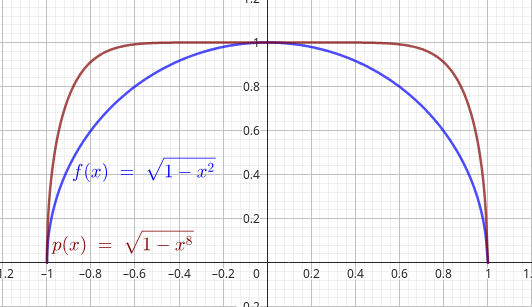